In [6]:
import pandas as pd
import networkx as nx


In [7]:
import matplotlib.pyplot as plt
import matplotlib

In [8]:
# Grabbing the data from imdb
MOVIE_DATASET_URL = 'https://raw.githubusercontent.com/utkarshaditya01/IR---The-Entertainment-Knowledge-Graph/main/Code/final_dataset_imdb.csv' 


New nodes we can create using the data

In [9]:
def create_IMDB_KG(movie_data):
    knowledge_graph = nx.Graph()

    for index, row in movie_data.iterrows():
        # Normalize and extract values
        title = str(row['title']).strip().lower()
        original_title = str(row['original_title']).strip().lower()
        year = str(row['year']).strip()
        genres = str(row['genre']).split(',') if isinstance(row['genre'], str) else []
        duration = str(row['duration']).strip()
        country = str(row['country']).split(',') if isinstance(row['country'], str) else []
        language = str(row['language']).strip() if pd.notna(row['language']) else None
        director = str(row['director']).strip()
        writer = str(row['writer']).strip()
        production_company = str(row['production_company']).strip()
        actors = str(row['actors']).split(',') if isinstance(row['actors'], str) else []
        description = str(row['description']).strip()
        avg_vote = str(row['avg_vote']).strip()
        votes = str(row['votes']).strip()

        # Movie node (using index as node id)
        knowledge_graph.add_node(title, label=title, type='movie', description=description)


        # Director node and edge
        knowledge_graph.add_node(director, label=director, type='director')
        knowledge_graph.add_edge(title, director, label='director', relationship='director')

        # Writer node and edge
        knowledge_graph.add_node(writer, label=writer, type='writer')
        knowledge_graph.add_edge(title, writer, label='writer', relationship='writer')

        # Production company node and edge
        knowledge_graph.add_node(production_company, label=production_company, type='production_company')
        knowledge_graph.add_edge(title, production_company, label='production_company', relationship='production_company')

        # Actors nodes and edges
        for actor in actors:
            actor = actor.strip()
            if actor:  # avoid empty strings
                knowledge_graph.add_node(actor, label=actor, type='actor')
                knowledge_graph.add_edge(title, actor, label='actor', relationship='actor')

        # Genres nodes and edges
        for g in genres:
            g = g.strip()
            if g:
                knowledge_graph.add_node(g, label=g, type='genre')
                knowledge_graph.add_edge(title, g, label='genre', relationship='genre_is')

        # Countries nodes and edges
        for c in country:
            c = c.strip()
            if c:
                knowledge_graph.add_node(c, label=c, type='country')
                knowledge_graph.add_edge(title, c, label='country', relationship='country')

        # Language node and edge (only if language is not None/empty)
        if language:
            knowledge_graph.add_node(language, label=language, type='language')
            knowledge_graph.add_edge(title, language, label='language', relationship='language')

        # Year node and edge
        if year:
            year_node = f'year_{year}'
            knowledge_graph.add_node(year_node, label=year, type='year', value=year)
            knowledge_graph.add_edge(title, year_node, label='year', relationship='year')

        # Duration node and edge
        if duration:
            duration_node = f'duration_{duration}'
            knowledge_graph.add_node(duration_node, label=duration, type='duration', value=duration)
            knowledge_graph.add_edge(title, duration_node, label='duration', relationship='duration')

        # Votes node and edge
        if votes:
            votes_node = f'votes_{votes}'
            knowledge_graph.add_node(votes_node, label=votes, type='votes', value=votes)
            knowledge_graph.add_edge(title, votes_node, label='votes', relationship='votes')

        # Avg vote node and edge
        if avg_vote:
            avg_vote_node = f'avg_vote_{avg_vote}'
            knowledge_graph.add_node(avg_vote_node, label=avg_vote, type='avg_vote', value=avg_vote)
            knowledge_graph.add_edge(title, avg_vote_node, label='avg_vote', relationship='avg_vote')

    return knowledge_graph


In [11]:
print("Loading movie data...")
movie_data = pd.read_csv(MOVIE_DATASET_URL)
print("Movie data loaded.")

print("Creating knowledge graph...")
knowledge_graph = create_IMDB_KG(movie_data)
print(f"Knowledge graph created with {knowledge_graph.number_of_nodes()} nodes and {knowledge_graph.number_of_edges()} edges.")


Loading movie data...
Movie data loaded.
Creating knowledge graph...
Knowledge graph created with 630786 nodes and 2091946 edges.


Now, lets check out subgraphs in the knowledge graph

In [12]:
def visualize_subgraph(subgraph):
    plt.figure(figsize=(12, 9))

    pos = nx.spring_layout(subgraph, k=0.5, seed=42)

    # Define colors for node types
    type_colors = {
        'movie': '#1f78b4',            # Blue
        'director': '#33a02c',         # Green
        'writer': '#ff7f00',           # Orange
        'production_company': '#6a3d9a', # Purple
        'actor': '#e31a1c',            # Red
        'genre': '#b15928',            # Brown
        'country': '#a6cee3',          # Light blue
        'language': '#fb9a99',         # Pink
        'year': '#fdbf6f',             # Light orange
        'duration': '#cab2d6',         # Lavender
        'votes': '#ffff99',            # Yellow
        'avg_vote': '#b2df8a'          # Light green
    }

    # Assign colors based on node type, default to grey if missing
    node_colors = []
    for node, data in subgraph.nodes(data=True):
        node_type = data.get('type', 'other')
        node_colors.append(type_colors.get(node_type, '#999999'))

    # Draw nodes with colors and a consistent size
    nx.draw_networkx_nodes(subgraph, pos,
                           node_color=node_colors,
                           node_size=500,
                           alpha=0.9)

    # Draw edges thicker for visibility
    nx.draw_networkx_edges(subgraph, pos, width=1.5, alpha=0.7)

    # Draw labels with smaller font size to avoid clutter
    nx.draw_networkx_labels(subgraph, pos, font_size=9, font_family='sans-serif')

    plt.title("Subgraph Visualization")
    plt.axis('off')
    plt.tight_layout()
    plt.show()

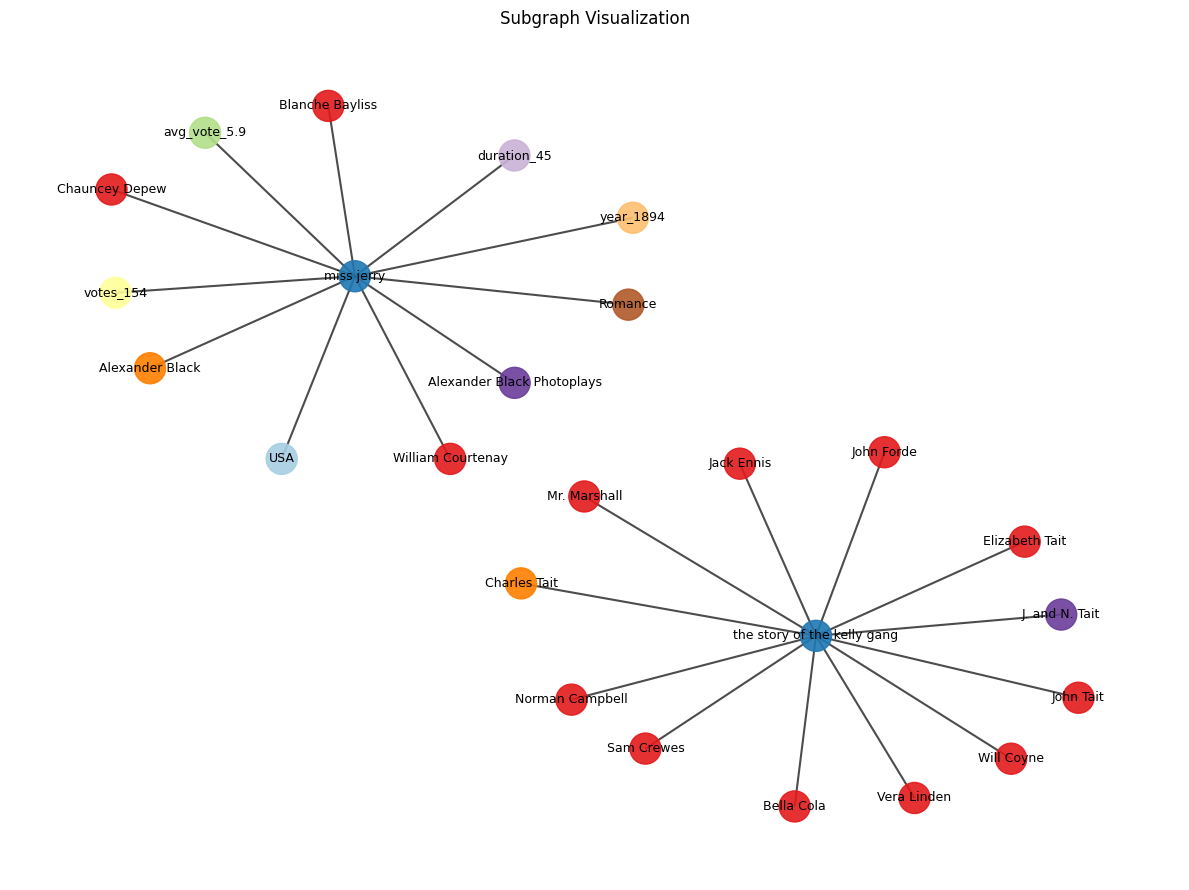

In [13]:
subgraph_nodes = list(knowledge_graph.nodes)[:25]
subgraph = knowledge_graph.subgraph(subgraph_nodes)
visualize_subgraph(subgraph)